# Titanic Dataset

[Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous dataset for ML.

### Logistic Regression - ML
I'm trying to predict a classification- survival or deceased by implementing Logistic Regression in Python for classification.

This is a "semi-cleaned" version of the titanic data set. If the dataset is used by the hosted one directly on Kaggle, some additional cleaning must be done which is not shown in this Notebook.

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# use this line of code for visualizing the data on Jupyter Notebook
%matplotlib inline

In [178]:
# load the data set into a Pandas Dataframe and read it
train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory data analysis

In [179]:
# let's see which of the data is null, i.e. missing data
train.isnull().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


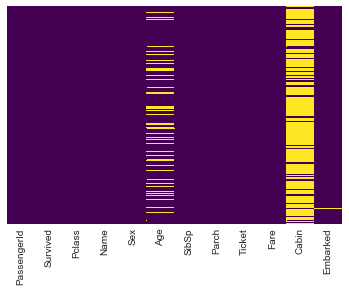

In [180]:
# make a heatmap of this kind of analysis by using seaborn library
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')
# every yellow dash is a true point, where True = Null value (NaN)

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level.

#### Check more data exploratory analysis and visualization to understand the data

In [181]:
# make a beautiful style for visualization
sns.set_style('whitegrid')

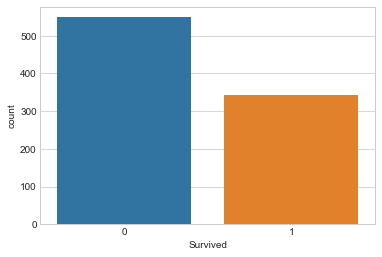

In [182]:
# see who survived and who did not
sns.countplot(x='Survived', data=train)
# 0 --> not survived | 1 --> survived

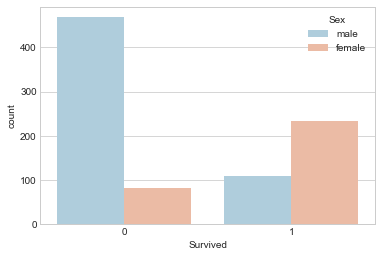

In [183]:
# see who survived and who did not related to sex
sns.countplot(x='Survived', data=train, hue='Sex', palette='RdBu_r')

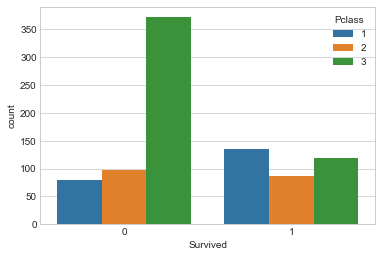

In [184]:
# see who survived and who did not related to passenger class
sns.countplot(x='Survived', data=train, hue='Pclass')

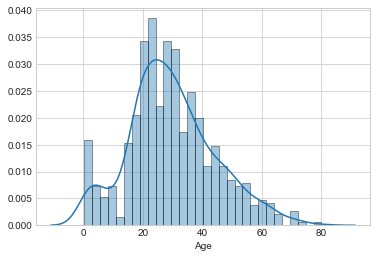

In [185]:
# see the passengers' ages that were boarded on Titanic | drop NaN so we don't have the Null values
sns.distplot(train['Age'].dropna(), bins=30, hist_kws=dict(edgecolor="k", linewidth=1))

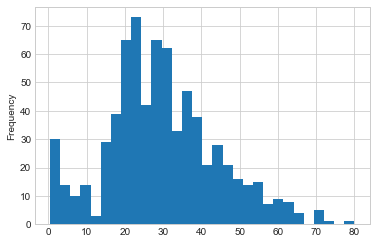

In [187]:
# see the same with Pandas built-in visualization library
train['Age'].plot.hist(bins=30)

In [188]:
# check again the info of the Dataframe
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


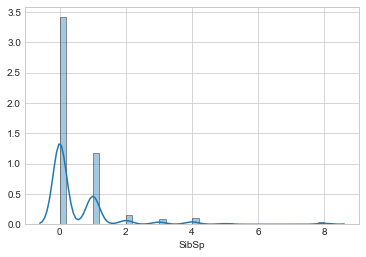

In [189]:
# see the nunber of Siblings and Spouses that were on board via the distribution plot
sns.distplot(train['SibSp'], bins=40, hist_kws=dict(edgecolor="k", linewidth=1))

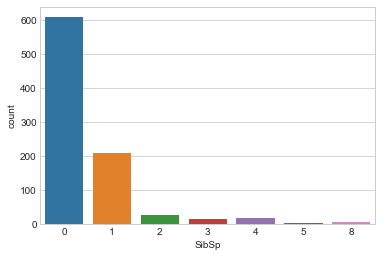

In [190]:
# see the Siblings and Spouses on board on countplot
sns.countplot(x='SibSp', data=train)

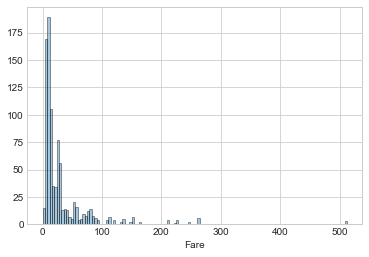

In [191]:
# see how much people paid as a Fare to be on board at Titanic
from matplotlib import rcParams
sns.distplot(train['Fare'], bins=130, kde=False, hist_kws=dict(edgecolor="k", linewidth=1))
rcParams['figure.figsize'] = 15, 7

#### It makes sense as most of the people are in Class 3, so they bought a cheap ticket

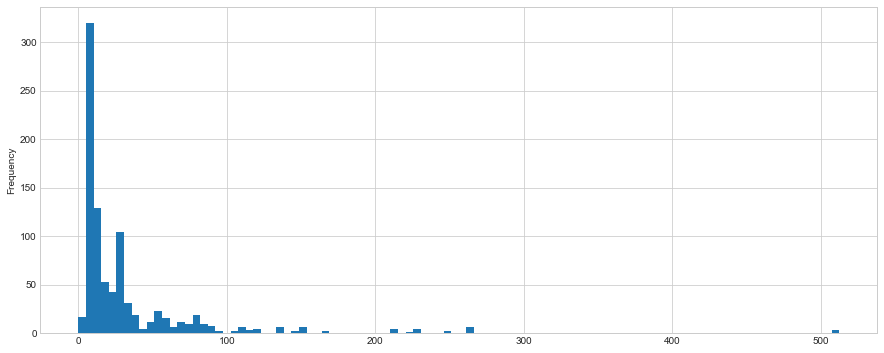

In [192]:
# or second way via the Pandas built-in visualization library
train['Fare'].plot.hist(bins=100, figsize=(15,6))

## Data Cleaning
A way is by filling in the missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (this method is known as ***imputation***). However, a smarter way is to **check the average age by passenger class**. 

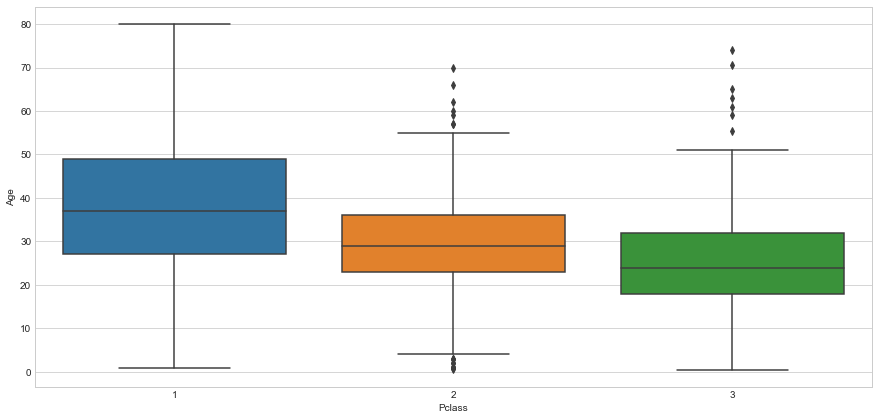

In [193]:
sns.boxplot(x='Pclass', y='Age', data=train)

The wealthier passengers in the higher classes tend to be older, which makes sense. These average age values will be now used to impute based on Pclass for Age.

#### Check exact the mean for each Passenger Class

In [194]:
# older ages are in a better class, which makes sense, as older people accumulate money and have better jobs
# than the younger ones
trainAge = train[train['Pclass'] == 1]
trainAge['Age'].dropna().mean()

38.233440860215055

In [195]:
trainAge = train[train['Pclass'] == 2]
trainAge['Age'].dropna().mean()

29.87763005780347

In [196]:
trainAge = train[train['Pclass'] == 3]
trainAge['Age'].dropna().mean()

25.14061971830986

#### Fill in the NaN values with the mean Age of each Passenger Class

In [197]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        if Pclass == 2:
            return 29
        else:
            return 25
    else:
        return Age


In [198]:
# apply the function to the 'Age' column
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

In [199]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [200]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


##### check now if there are null values with heatmap:

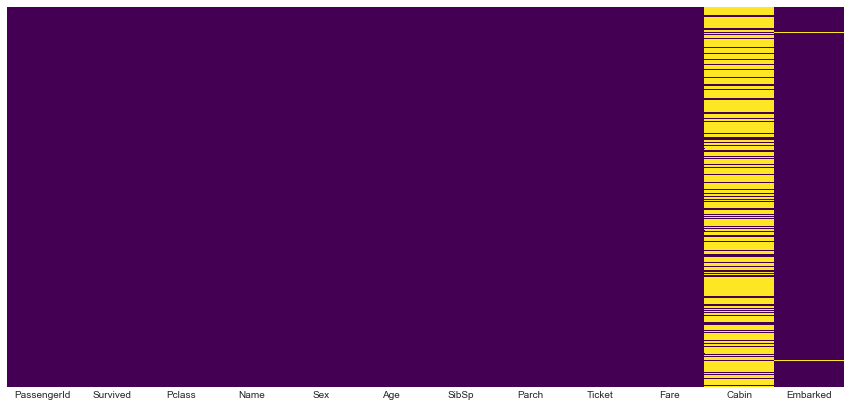

In [201]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

#### Now, because in Cabin column there are so many NaN values, the preferred way is to drop that column:

In [202]:
train.drop('Cabin', axis=1, inplace=True)

In [203]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


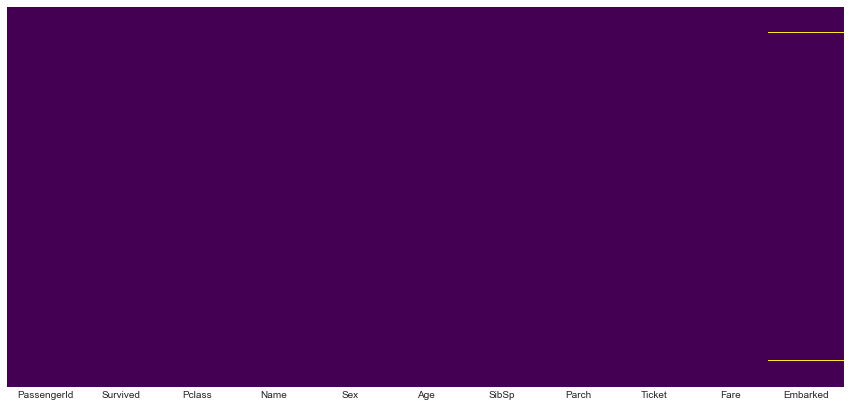

In [204]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

#### Now, because there is a few missing values (only two) in Embarked column, the preferred way is to drop them:

In [205]:
train.dropna(inplace=True)

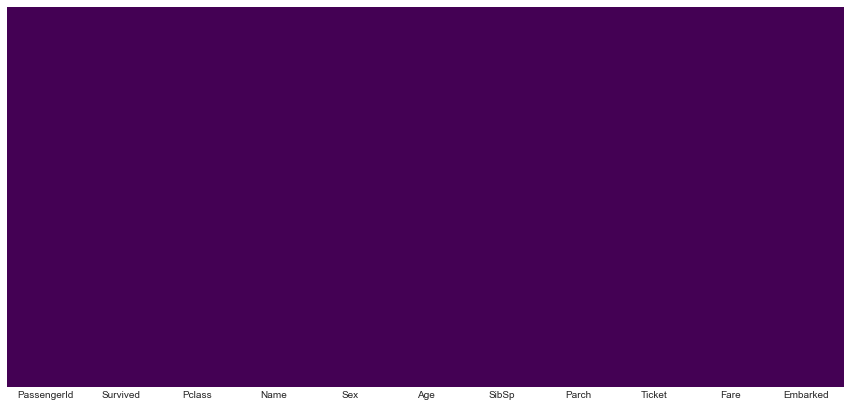

In [206]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Nothing is missing now!!

### Converting Categorical Features
#### Creating dummy values (indicator variables) of the features so the Algorithm can understand the categories as inputs:
(e.g. Male: 1 | Female: 0)

*This is done by converting categorical features to dummy variables using Pandas. Otherwise, the machine learning algorithm won't be able to directly take in those features as inputs.*

In [209]:
# creating dummy variables for 'Sex' column with Pandas get_dummies method (Converting Male and Female to
# the appropriate Numerical values, so the algorithm can fetch them as inputs)
sex = pd.get_dummies(train['Sex'], drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [210]:
# same here for 'Embarked' column
embark = pd.get_dummies(train['Embarked'], drop_first=True)
embark.head()
# the C value is dropped, so this column values are not perfect predictors

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [211]:
# add these new columns to the main dataframe by concatenating the dataframes
train = pd.concat([train, sex, embark], axis=1, )
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


#### Now, the unused columns that include characters will be dropped. There is no so much information that can be used
* Another way to set up the data with characters is *Feature Engineering*, e.g. : Grabbing the first letter of the ticket or the title of someone's name (Mr, Miss, etc)

In [212]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [213]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [214]:
# check the PassengerId column if it is actually a autoincrement ID of passengers
train.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
886,887,0,2,27.0,0,0,13.00,1,0,1
887,888,1,1,19.0,0,0,30.00,0,0,1
888,889,0,3,25.0,1,2,23.45,0,0,1
889,890,1,1,26.0,0,0,30.00,1,0,0
890,891,0,3,32.0,0,0,7.75,1,1,0


In [215]:
# drop the PassengerId cause it is not useful
train.drop('PassengerId', axis=1, inplace=True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


##### The Parch column is left the same, without processing, so to see later in the algorithm implementation if it affects the output. (The Parch column is not yet a category of two, but it contains more numbers as a continuous variable)

## Building the Logistic Regression model

In [216]:
# train and test set split
from sklearn.model_selection import train_test_split

In [217]:
# separating the data from train dataset into the X, y (where y is the labeled data, which will be predicted)
X = train.drop('Survived', axis=1)
y = train['Survived']

In [218]:
# doing the train - test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [219]:
# calling the Logistic Regression model from the correspoding family
from sklearn.linear_model import LogisticRegression

In [220]:
# making the machine learning object
logmodel = LogisticRegression()

In [221]:
# training the data
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [222]:
predictions = logmodel.predict(X_test)

In [223]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1])

### Evaluating the model results

#### 1) Classification report

In [224]:
from sklearn.metrics import classification_report

In [225]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       163
          1       0.82      0.65      0.73       104

avg / total       0.81      0.81      0.80       267



#### 2) Confusion matrix

In [226]:
from sklearn.metrics import confusion_matrix

In [227]:
print(confusion_matrix(y_test, predictions))

[[148  15]
 [ 36  68]]


For exploring other feature engineering and the other titanic_text.csv file, some suggestions for feature engineering are:

* grabbing the Title (Dr.,Mr.,Mrs,etc..) from the name as a feature
* the Cabin letter maybe could be a feature
* info can be obtained from the ticket